### Part 1: PCA:

Problem Statement: The ‘Hair Salon.csv’  dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Factor-Hair-Revised (1).csv")

In [3]:
data.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


## Part 1: PCA: Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented. (5marks)

In [4]:
data.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [7]:
#checking for duplicates.
data.duplicated().sum()

0

* we have 0 non-null values.
* All the variables are in float data type.
* There are total 13 features and 100 rows in the dataset provided.
* There are no duplicates.

<AxesSubplot:>

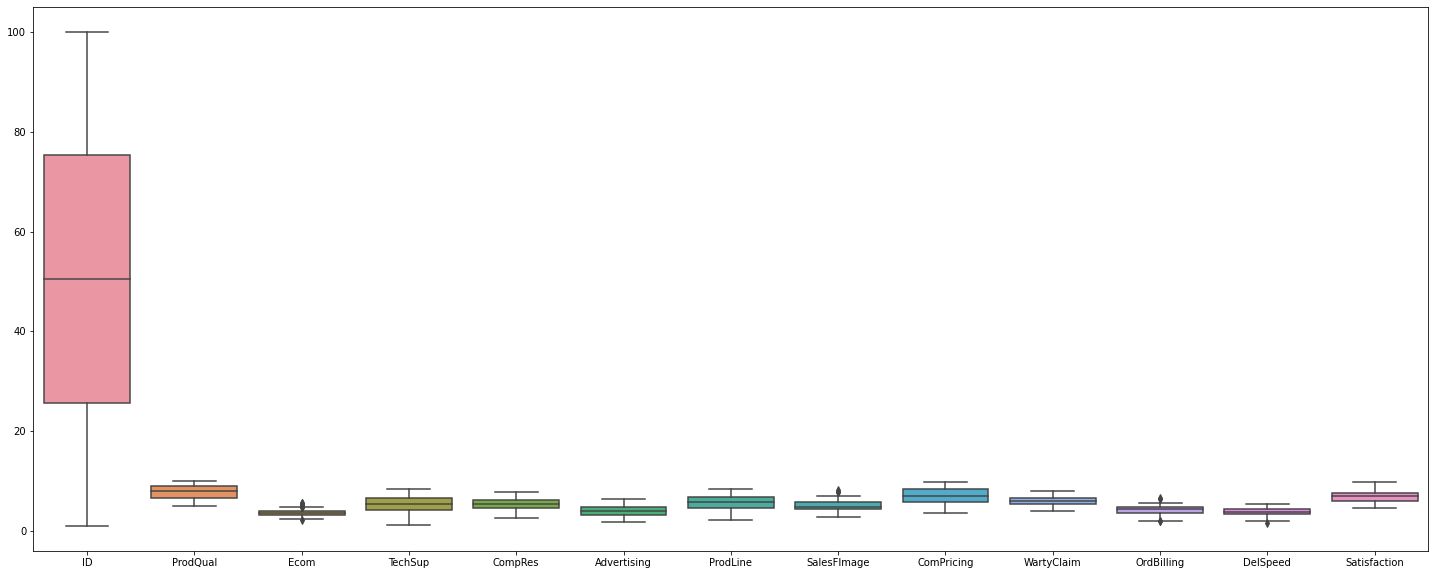

In [8]:
#univerate Analysis

plt.figure(figsize=(25,10))
sns.boxplot(data=data)

* we should drop the id column as ot has no significant change on data.

In [9]:
data.drop("ID",axis=1,inplace=True)

In [10]:
data.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


<AxesSubplot:>

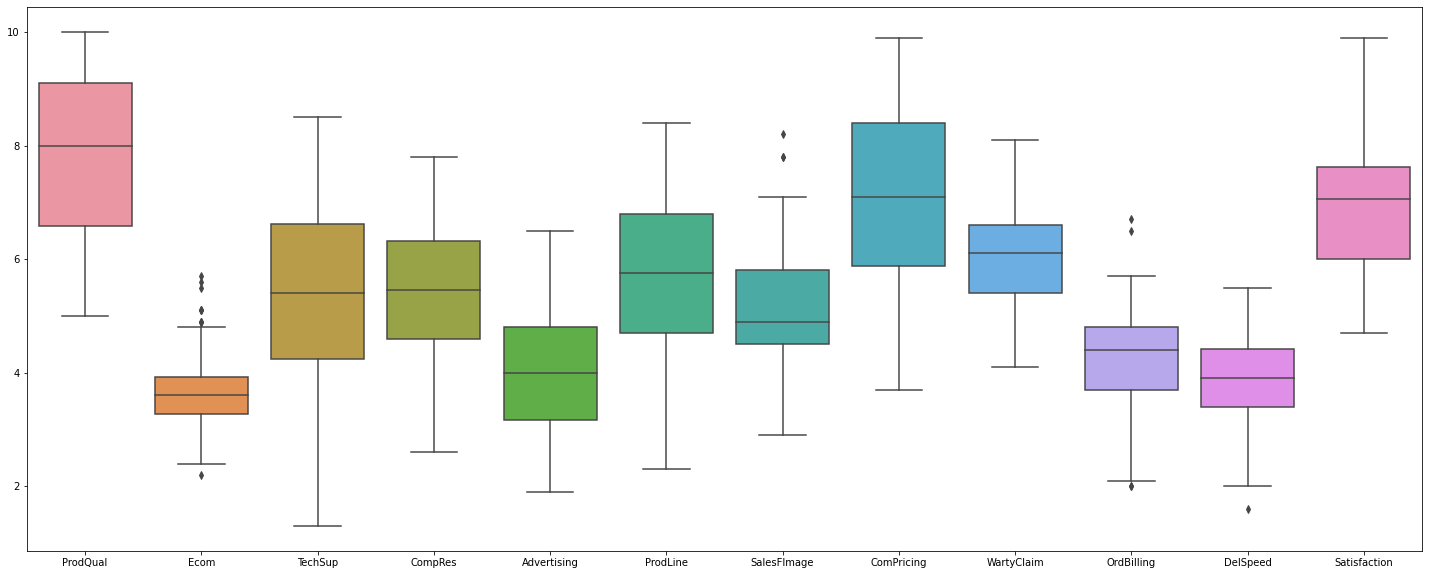

In [11]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data)

* we can observe some outliers, in Ecom , salesFimage , ordbillin , Delspeed

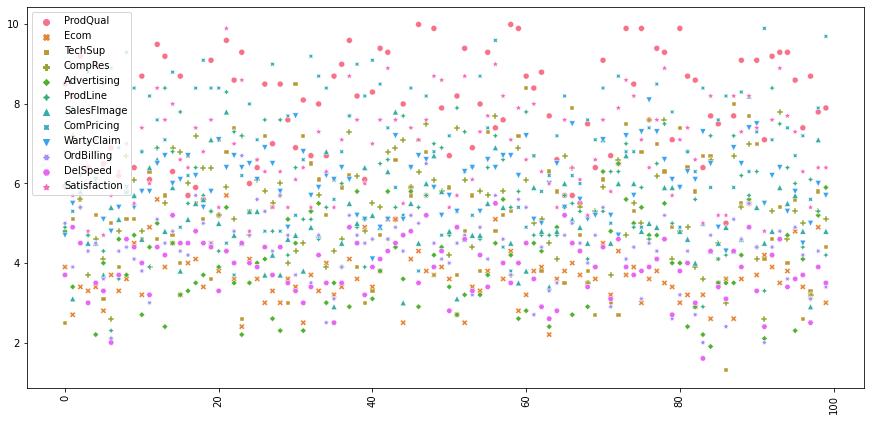

In [12]:
#multiveriate analysis.
plt.figure(figsize=(15,7))
sns.scatterplot(data=data)
plt.xticks(rotation = 90)
plt.show();



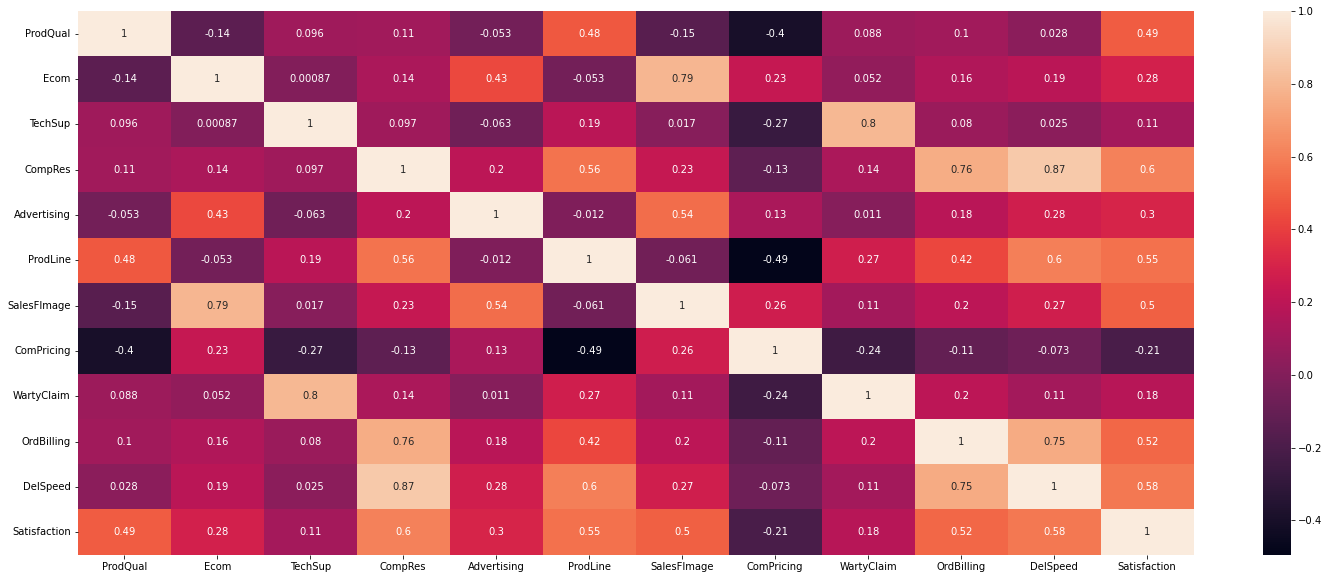

In [13]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True);

*Ecom & salesFimage , TechSup & Wartclaim , CompRes & Odbilling , CompRes & DelSpeed are most corelated . 
* All have positive corelations with each other.

<AxesSubplot:xlabel='Ecom', ylabel='SalesFImage'>

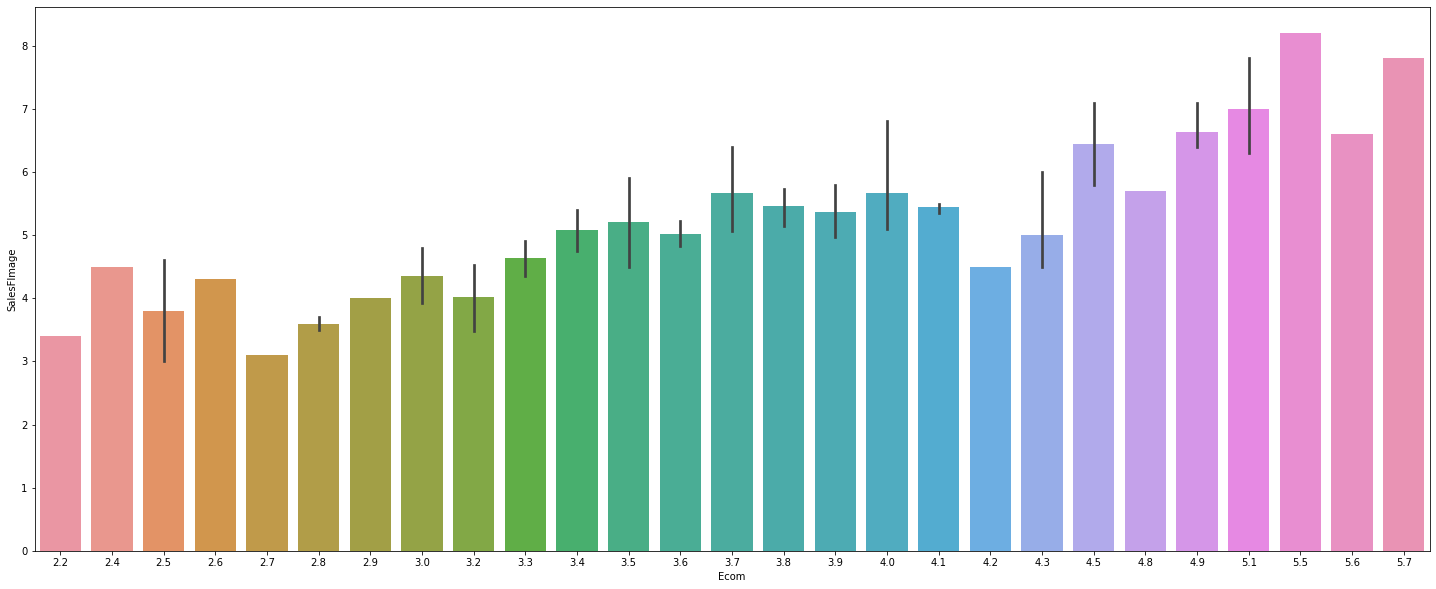

In [15]:
plt.figure(figsize=(25,10))
sns.barplot(data=data, x="Ecom",y="SalesFImage")

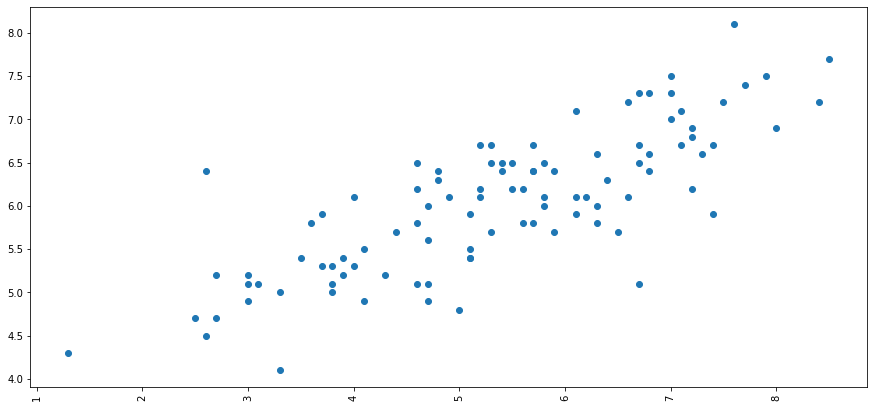

In [16]:
plt.figure(figsize=(15,7))
plt.scatter(data['TechSup'],data['WartyClaim'])
plt.xticks(rotation = 90)
plt.show();

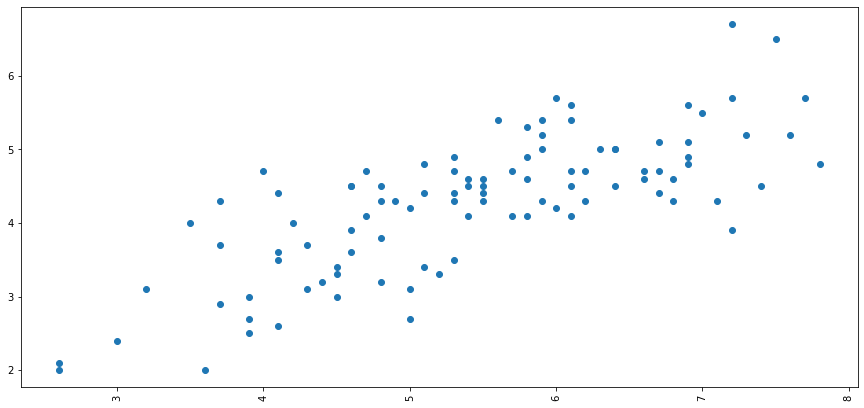

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(data['CompRes'],data['OrdBilling'])
plt.xticks(rotation = 90)
plt.show();

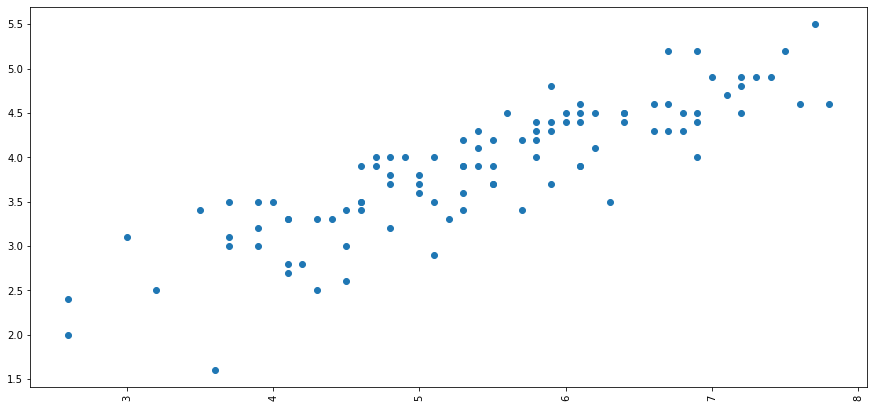

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(data['CompRes'],data['DelSpeed'])
plt.xticks(rotation = 90)
plt.show();

## Part 1: PCA: Scale the variables and write the inference for using the type of scaling function for this case study. (3 marks)

In [19]:
# Z-score
from scipy.stats import zscore
data_scaled = data.apply(zscore)
data_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


* Z-score is a variation of scaling that represents the number of standard deviations away from the mean.
* I would use z-score to ensure your feature distributions have mean = 0 and std = 1. It's useful when there are a few outliers, but not so extreme that you need clipping.
* As This daatast has minimal outliers ,we used z-score.

In [20]:
data_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,8.744394e-16,1.005038,-2.022630,-0.888949,0.136761,0.928538,1.576356
Ecom,100.0,1.020295e-15,1.005038,-2.111893,-0.569580,-0.103299,0.362982,2.909592
TechSup,100.0,1.015854e-15,1.005038,-2.669451,-0.732211,0.022984,0.827431,2.058728
CompRes,100.0,-1.343370e-16,1.005038,-2.363712,-0.700298,0.006654,0.734398,1.961166
Advertising,100.0,-5.884182e-16,1.005038,-1.881755,-0.744675,-0.008918,0.704543,2.220649
ProdLine,100.0,2.353673e-16,1.005038,-2.678246,-0.844354,-0.042027,0.760301,1.982896
SalesFImage,100.0,6.156187e-16,1.005038,-2.083519,-0.583910,-0.209008,0.634522,2.883936
ComPricing,100.0,-7.016610e-16,1.005038,-2.129693,-0.714885,0.081961,0.927594,1.903324
WartyClaim,100.0,-1.274536e-15,1.005038,-2.382210,-0.788348,0.069885,0.682908,2.521979
OrdBilling,100.0,4.440892e-16,1.005038,-2.464877,-0.625417,0.132008,0.564823,2.620690


<AxesSubplot:>

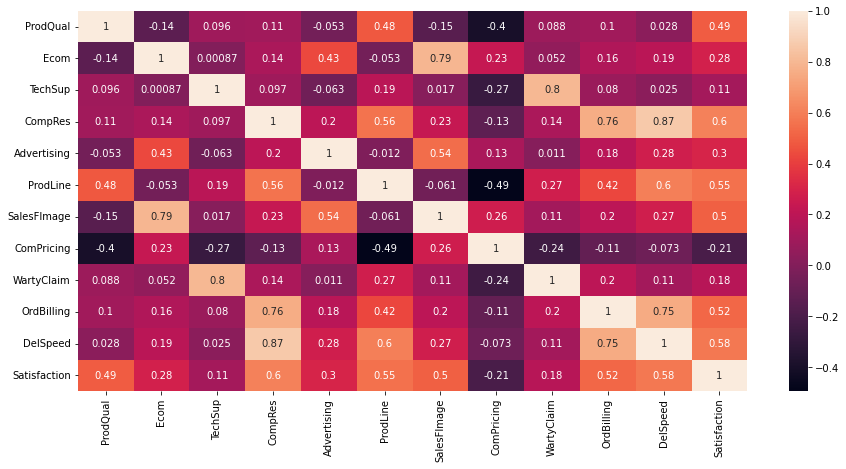

In [21]:
#Checking for corelations
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

There seems no major difference in correlations before and after scaling

## Part 1: PCA: Comment on the comparison between covariance and the correlation matrix after scaling. (2 marks)

In [22]:
data.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


In [23]:
data_scaled.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


* There seems no major difference in correlations before and after scaling

In [24]:
data.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.949596,-0.134162,0.204293,0.179475,-0.084141,0.876919,-0.227303,-0.865697,0.101081,0.135273,0.028424,0.809313
Ecom,-0.134162,0.490723,0.000929,0.118663,0.339374,-0.048545,0.594590,0.248356,0.029802,0.101600,0.098594,0.236065
TechSup,0.204293,0.000929,2.342298,0.178758,-0.108434,0.387753,0.027884,-0.640313,1.000106,0.113869,0.028596,0.205384
CompRes,0.179475,0.118663,0.178758,1.460238,0.268162,0.892313,0.297711,-0.238897,0.139085,0.849519,0.767766,0.868832
Advertising,-0.084141,0.339374,-0.108434,0.268162,1.270000,-0.017121,0.655222,0.233697,0.009970,0.192848,0.228323,0.409212
ProdLine,0.876919,-0.048545,0.387753,0.892313,-0.017121,1.729975,-0.086480,-1.005828,0.294429,0.518495,0.581384,0.863040
SalesFImage,-0.227303,0.594590,0.027884,0.297711,0.655222,-0.086480,1.149870,0.438382,0.094456,0.194349,0.213861,0.639279
ComPricing,-0.865697,0.248356,-0.640313,-0.238897,0.233697,-1.005828,0.438382,2.387196,-0.310285,-0.164416,-0.082691,-0.383568
WartyClaim,0.101081,0.029802,1.000106,0.139085,0.009970,0.294429,0.094456,-0.310285,0.671971,0.150046,0.065861,0.173461
OrdBilling,0.135273,0.101600,0.113869,0.849519,0.192848,0.518495,0.194349,-0.164416,0.150046,0.862743,0.512315,0.577572


In [25]:
data_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998,0.491237
Ecom,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572,0.285601
TechSup,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698,0.113735
CompRes,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830,0.609356
Advertising,-0.054013,0.434233,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650,0.307747
ProdLine,0.482317,-0.053220,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930,0.556107
SalesFImage,-0.153346,0.799539,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294,0.505258
ComPricing,-0.405335,0.231780,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608,-0.210400
WartyClaim,0.089204,0.052422,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500,0.179338
OrdBilling,0.105357,0.157725,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589,0.527002


<AxesSubplot:>

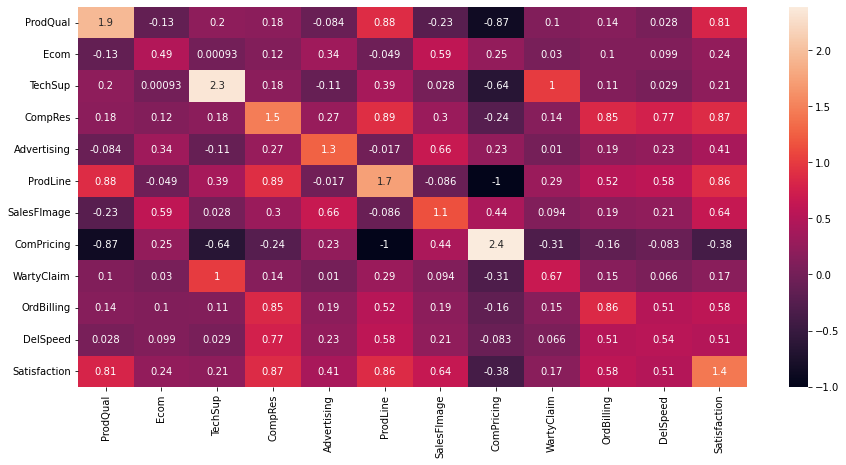

In [26]:
#Checking for corelations
plt.figure(figsize=(15,7))
sns.heatmap(data.cov(),annot=True)

<AxesSubplot:>

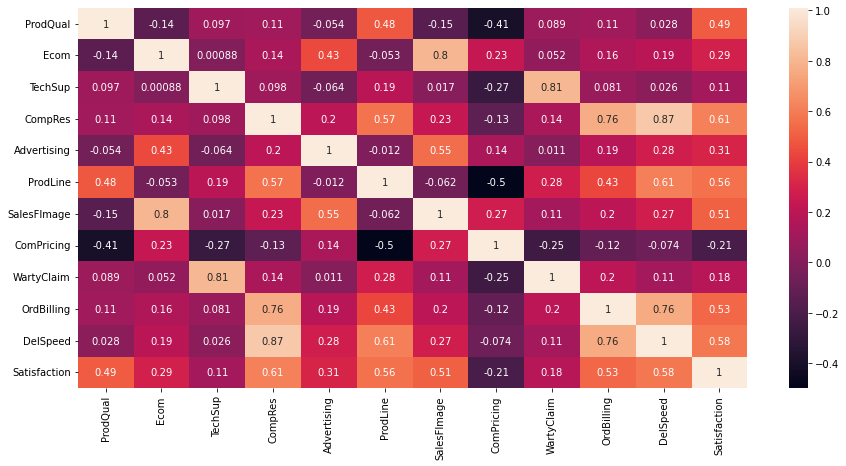

In [27]:
#Checking for corelations
plt.figure(figsize=(15,7))
sns.heatmap(data_scaled.cov(),annot=True)

## Part 1: PCA: Check the dataset for outliers before and after scaling. Draw your inferences from this exercise. (3 marks)

<AxesSubplot:>

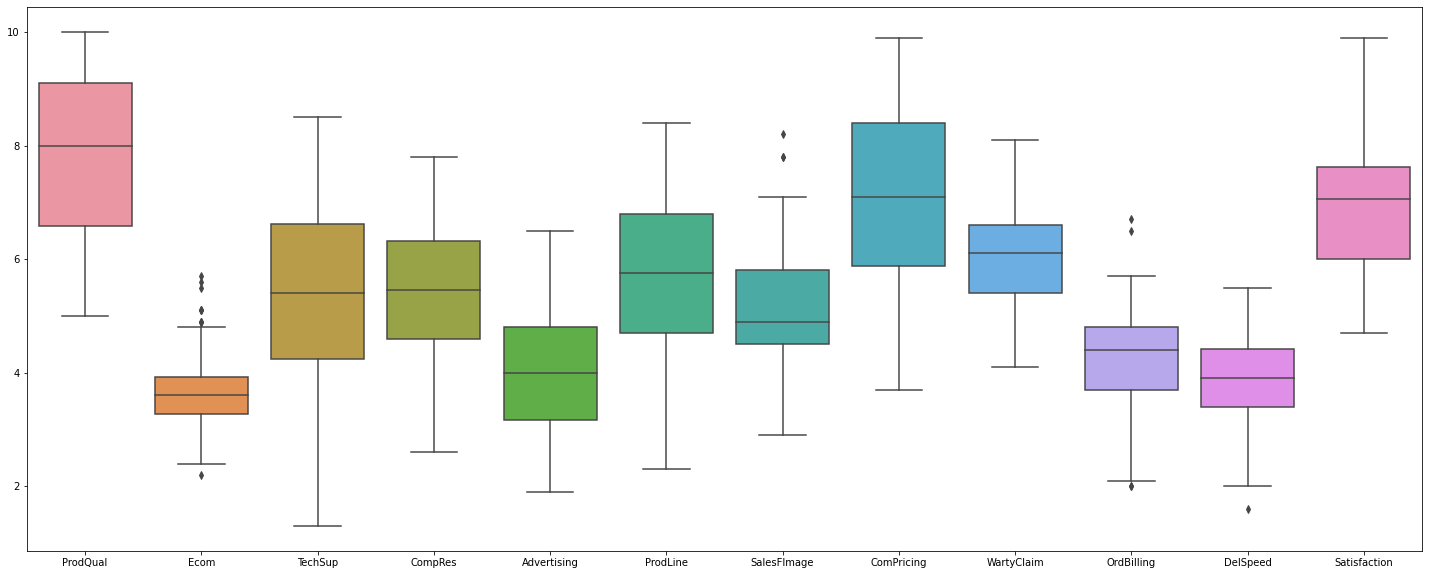

In [30]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data)

<AxesSubplot:>

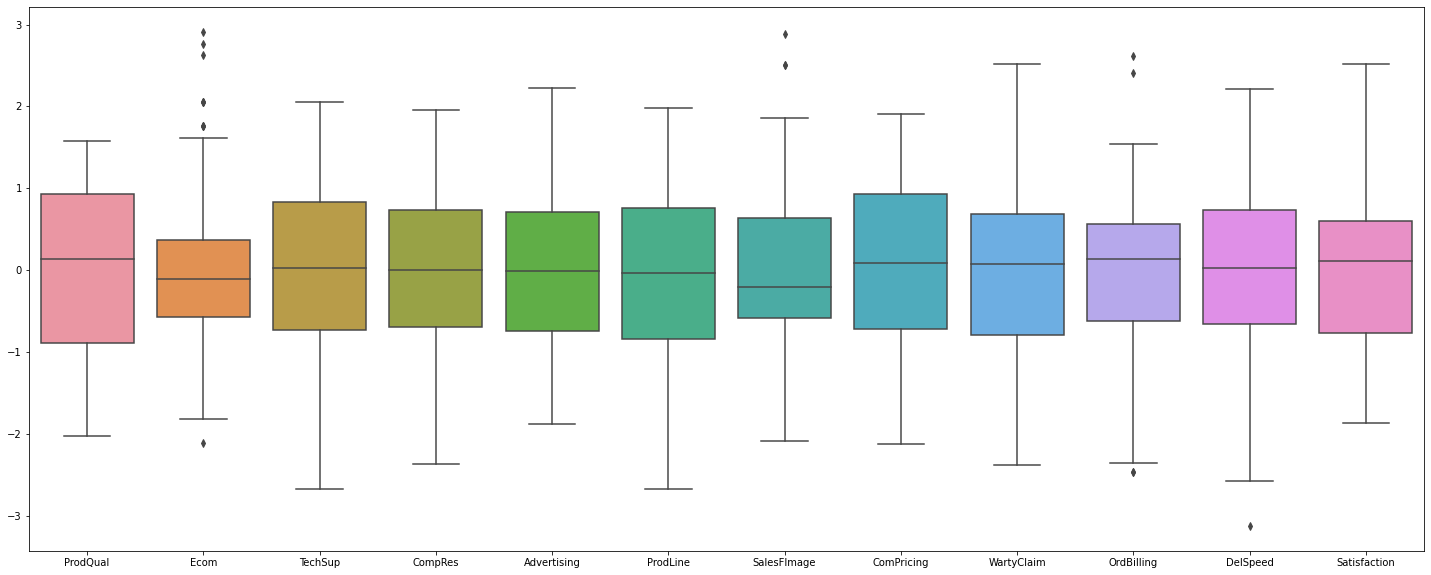

In [31]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data_scaled)

* Outliers has not been eliminated totally after scaling .

## Part 1: PCA: Build the covariance matrix, eigenvalues and eigenvector. (4 marks)

In [32]:
data_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998,0.491237
Ecom,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572,0.285601
TechSup,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698,0.113735
CompRes,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830,0.609356
Advertising,-0.054013,0.434233,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650,0.307747
ProdLine,0.482317,-0.053220,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930,0.556107
SalesFImage,-0.153346,0.799539,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294,0.505258
ComPricing,-0.405335,0.231780,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608,-0.210400
WartyClaim,0.089204,0.052422,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500,0.179338
OrdBilling,0.105357,0.157725,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589,0.527002


In [33]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12 , random_state=123)
pca_transformed = pca.fit_transform(data_scaled)

In [34]:
#covarience matrix
cov_matrix=np.cov(data_scaled.T)
cov_matrix

array([[ 1.01010101e+00, -1.38548704e-01,  9.65661154e-02,
         1.07444445e-01, -5.40132667e-02,  4.82316579e-01,
        -1.53346338e-01, -4.05335236e-01,  8.92043497e-02,
         1.05356640e-01,  2.79979825e-02,  4.91237372e-01],
       [-1.38548704e-01,  1.01010101e+00,  8.75544162e-04,
         1.41595213e-01,  4.34233041e-01, -5.32200387e-02,
         7.99539102e-01,  2.31780203e-01,  5.24224157e-02,
         1.57724577e-01,  1.93571786e-01,  2.85601025e-01],
       [ 9.65661154e-02,  8.75544162e-04,  1.01010101e+00,
         9.76329270e-02, -6.35051180e-02,  1.94571168e-01,
         1.71621612e-02, -2.73521901e-01,  8.05220127e-01,
         8.09109340e-02,  2.56976702e-02,  1.13734524e-01],
       [ 1.07444445e-01,  1.41595213e-01,  9.76329270e-02,
         1.01010101e+00,  1.98905906e-01,  5.67087831e-01,
         2.32072486e-01, -1.29246720e-01,  1.41826562e-01,
         7.64513729e-01,  8.73829997e-01,  6.09356166e-01],
       [-5.40132667e-02,  4.34233041e-01, -6.3505118

In [35]:
#Extract eigen Values and eigen vectors

eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

In [36]:
# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)


Raw Eigenvalues: 
 [4.08369694 2.57871152 1.70931735 1.22984483 0.6423868  0.57427406
 0.40689671 0.32775774 0.23852472 0.14568036 0.08398124 0.10013985]


In [37]:
# let's look at the cumulative variance described by each component
var_exp=pca.explained_variance_ratio_
var_exp

array([0.336905  , 0.2127437 , 0.14101868, 0.1014622 , 0.05299691,
       0.04737761, 0.03356898, 0.02704001, 0.01967829, 0.01201863,
       0.00826154, 0.00692845])

In [38]:
# print the Eigenvectorss
print("Raw Eigenvectors: \n", eigen_vecs)

Raw Eigenvectors: 
 [[ 0.15855116 -0.31313152 -0.07356137 -0.61407082 -0.24964531  0.36499541
  -0.12640774 -0.32687751  0.18602426 -0.2037033  -0.21787575  0.22885317]
 [ 0.1661857   0.44059261  0.23651951 -0.19628244 -0.18886909 -0.46540483
  -0.00824784 -0.50785197  0.21574952 -0.03718659  0.35323725 -0.02881148]
 [ 0.12514332 -0.23828985  0.61631236  0.17941402 -0.03977108  0.12392836
   0.01346077  0.08182818  0.54753081  0.42475155 -0.10580091 -0.01766533]
 [ 0.42263337  0.00134121 -0.19665426  0.27970497 -0.03340857  0.01495235
   0.00463818  0.14929932  0.43697539 -0.58601845 -0.05627641 -0.37853377]
 [ 0.1807615   0.35724531  0.0898675  -0.20600014  0.76107633  0.4189084
   0.07155058 -0.12282896  0.04176506  0.02836138  0.04824083 -0.0968768 ]
 [ 0.35283874 -0.29778667 -0.11122737 -0.10008828  0.0250607  -0.1958228
   0.63397913 -0.22319134 -0.23246141  0.25391841 -0.18600871 -0.34728677]
 [ 0.21794995  0.46488879  0.2409419  -0.19948826 -0.14209236 -0.16711795
  -0.02165026 

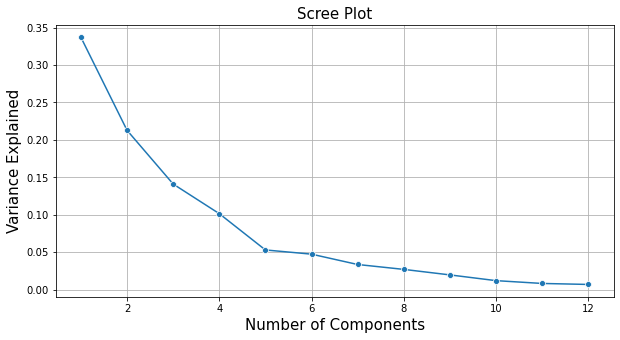

In [39]:
# View Scree Plot to identify the number of components to be built
plt.figure(figsize=(10,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

## Part 1: PCA: Write the explicit form of the first PC (in terms of Eigen Vectors). (5 marks)


[ 0.15855116 -0.31313152 -0.07356137 -0.61407082 -0.24964531  0.36499541
  -0.12640774 -0.32687751  0.18602426 -0.2037033  -0.21787575  0.22885317]

In [41]:
data_scaled.columns

Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed',
       'Satisfaction'],
      dtype='object')

#### The explicit form of first PC is as below:
#### PC1= 0.15*ProdQual - 0.31*Ecom - 0.07*TechSup - 0.61*CompRes - 0.24*Advertising + 0.36*F.ProdLine - 0.12*P.SalesFImage - 0.32*ComPricing + 0.18*WartyClaim - 0.2*OrdBilling - 0.21*DelSpeed + 0.22*Satisfaction 


## Part 1: PCA: Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame. (8 marks)


In [42]:
# let's look at the cumulative variance described by each component
var_exp=pca.explained_variance_ratio_
var_exp

array([0.336905  , 0.2127437 , 0.14101868, 0.1014622 , 0.05299691,
       0.04737761, 0.03356898, 0.02704001, 0.01967829, 0.01201863,
       0.00826154, 0.00692845])

In [43]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.336905  , 0.5496487 , 0.69066738, 0.79212958, 0.84512649,
       0.8925041 , 0.92607308, 0.95311309, 0.97279138, 0.98481001,
       0.99307155, 1.        ])

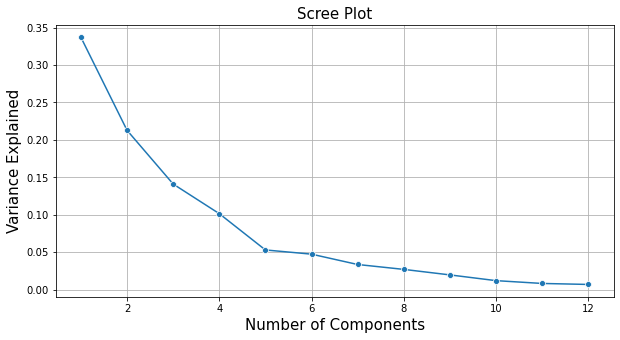

In [44]:
# View Scree Plot to identify the number of components to be built
plt.figure(figsize=(10,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [45]:
* Total no. of optimun variables is 8 s it explains the 95% varience.
* eigenvectors indicates direction.

SyntaxError: invalid syntax (4023148026.py, line 1)

In [46]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 12 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_scaled)
data_reduced.transpose()

array([[-4.90389228e-01, -4.95644452e-01, -2.72790876e+00,
         2.23686406e+00,  6.44060603e-01,  3.44531358e+00,
         5.18665307e+00,  1.56754726e+00, -5.45533589e-01,
         8.77543506e-02,  3.53037083e-01,  1.96981413e+00,
        -3.06018020e+00, -1.27714330e+00, -2.17494763e+00,
        -9.38724935e-01, -2.92413570e-01, -1.87002667e+00,
        -3.09493250e-01, -1.46257880e+00,  1.83470422e+00,
        -3.99103340e+00, -1.09616365e+00, -2.31648391e+00,
         1.03946605e+00, -1.29134992e-01, -1.28835678e+00,
         1.55129955e+00, -8.77133855e-01,  1.98974823e+00,
         5.14615167e-01,  2.19643426e+00,  1.50934230e+00,
        -2.22604159e-01,  1.80964165e+00,  2.50030358e+00,
         5.00000995e-01, -2.97934534e+00, -6.03818265e-01,
         1.33227969e+00,  1.04560651e+00, -1.57953301e-01,
        -2.49341218e+00, -2.34165757e+00, -2.20629637e-01,
        -1.63328734e+00, -9.91194739e-01, -2.99607203e+00,
        -1.72113662e+00, -1.36829741e+00,  2.36516594e+0

In [47]:
data_reduced.shape

(100, 8)

In [48]:
pd.DataFrame(data_reduced).head()

,0,1,2,3,4,5,6,7
0,-0.490389,1.580229,1.943132,1.371775,0.066902,0.027757,1.232500,0.421646
1,-0.495644,-2.485075,1.985439,-1.037741,0.936743,-0.431697,-1.260651,-0.262177
2,-2.727909,-0.761250,0.187628,1.265916,1.089905,0.151429,0.506831,0.408908
3,2.236864,0.176334,-1.864573,-1.345408,0.616691,1.156490,0.051858,-0.877704
4,0.644061,-1.392029,0.265044,0.374907,-1.280251,-0.133765,0.441874,-0.212862


In [49]:
#cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

array([33.7, 55. , 69.1, 79.2, 84.5, 89.2, 92.6, 95.3])

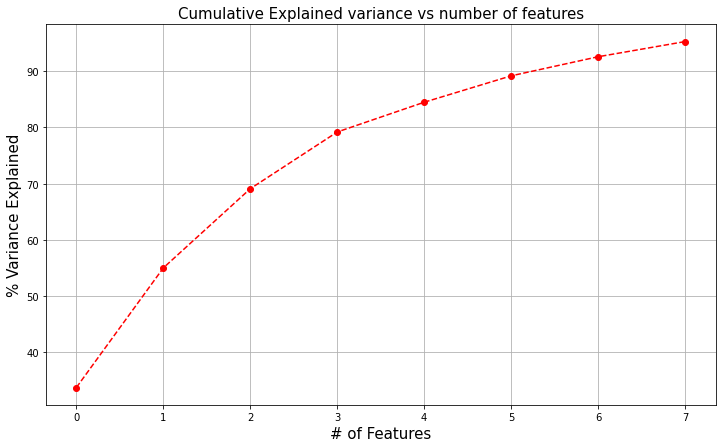

In [50]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [51]:
df = pd.DataFrame(data_reduced)
df.columns = df.columns+1
df.index = df.index+1 
df

,1,2,3,4,5,6,7,8
1,-0.490389,1.580229,1.943132,1.371775,0.066902,0.027757,1.232500,0.421646
2,-0.495644,-2.485075,1.985439,-1.037741,0.936743,-0.431697,-1.260651,-0.262177
3,-2.727909,-0.761250,0.187628,1.265916,1.089905,0.151429,0.506831,0.408908
4,2.236864,0.176334,-1.864573,-1.345408,0.616691,1.156490,0.051858,-0.877704
5,0.644061,-1.392029,0.265044,0.374907,-1.280251,-0.133765,0.441874,-0.212862
...,...,...,...,...,...,...,...,...
96,-0.424050,0.138239,-0.236495,0.593970,-1.721243,-1.314048,0.723224,-0.671635
97,1.630872,0.975224,2.133135,0.269824,0.385924,-0.119686,0.647509,0.151432
98,3.417553,-1.765533,1.356573,1.439550,0.472030,-0.629374,-0.118278,-0.865544
99,-0.483486,2.318799,-1.142911,0.580251,0.002923,-0.294119,-0.007650,-0.643440


In [52]:
df.corr()

,1,2,3,4,5,6,7,8
1,1.000000e+00,4.368114e-16,-1.281870e-16,-2.604617e-16,9.554964e-17,-9.373432e-17,8.264751e-17,2.825598e-16
2,4.368114e-16,1.000000e+00,2.125912e-16,-2.597601e-17,2.387404e-16,-9.215397e-17,-2.758876e-16,3.259980e-16
3,-1.281870e-16,2.125912e-16,1.000000e+00,5.162853e-17,-2.985861e-16,-4.074803e-17,1.075751e-16,-2.901006e-16
4,-2.604617e-16,-2.597601e-17,5.162853e-17,1.000000e+00,2.674776e-16,-1.281037e-16,-1.991516e-16,1.248579e-16
5,9.554964e-17,2.387404e-16,-2.985861e-16,2.674776e-16,1.000000e+00,4.874399e-16,4.496644e-17,-1.527497e-16
6,-9.373432e-17,-9.215397e-17,-4.074803e-17,-1.281037e-16,4.874399e-16,1.000000e+00,-1.623945e-17,3.838534e-16
7,8.264751e-17,-2.758876e-16,1.075751e-16,-1.991516e-16,4.496644e-17,-1.623945e-17,1.000000e+00,-4.798180e-17
8,2.825598e-16,3.259980e-16,-2.901006e-16,1.248579e-16,-1.527497e-16,3.838534e-16,-4.798180e-17,1.000000e+00


In [53]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_scaled))
df_comp.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-0.158551,-0.166186,-0.125143,-0.422633,-0.180761,-0.352839,-0.217950,0.134837,-0.174991,-0.387979,-0.422341,-0.413025
1,-0.313132,0.440593,-0.238290,0.001341,0.357245,-0.297787,0.464889,0.417763,-0.201184,0.009062,0.054457,0.023904
2,0.073561,-0.236520,-0.616312,0.196654,-0.089867,0.111227,-0.240942,0.051667,-0.605460,0.155037,0.217990,0.028739
3,0.614071,0.196282,-0.179414,-0.279705,0.206000,0.100088,0.199488,-0.240795,-0.189599,-0.306686,-0.289903,0.331190
4,-0.249645,-0.188869,-0.039771,-0.033409,0.761076,0.025061,-0.142092,-0.489648,-0.021586,-0.049084,0.062220,-0.229674


<AxesSubplot:>

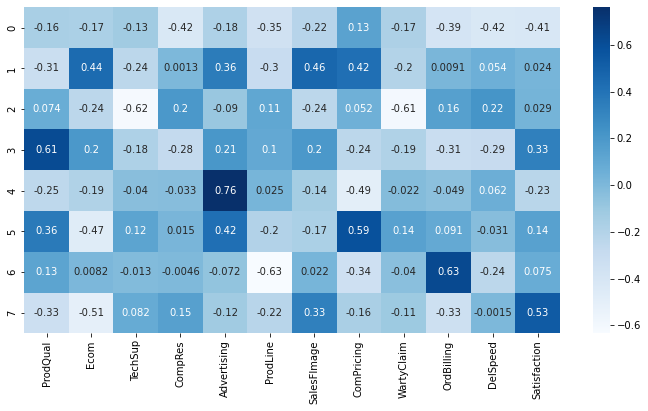

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,annot=True,cmap='Blues')

## Part 1: PCA: Mention the business implication of using the Principal Component Analysis for this case study. (5 marks)


## 2.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, etc)


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
dataset = pd.read_csv('State_wise_Health_income (1).csv')
dataset

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


In [57]:
dataset = dataset.drop(['Unnamed: 0','States'], axis=1)

In [58]:
print(dataset.info(),'\n')
print(dataset.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB
None 

Health_indeces1      int64
Health_indices2      int64
Per_capita_income    int64
GDP                  int64
dtype: object


In [59]:
dataset.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,417,66,564,1823
1,1485,646,2710,73662
2,654,299,1104,27318
3,192,25,573,250
4,43,8,528,22


In [60]:
dataset.isnull().sum()

Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [61]:
dataset.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.000000,297.000000,297.000000,297.000000
mean,2630.151515,693.632997,2156.915825,174601.117845
std,2038.505431,468.944354,1491.854058,167167.992863
min,-10.000000,0.000000,500.000000,22.000000
25%,641.000000,175.000000,751.000000,8721.000000
50%,2451.000000,810.000000,1865.000000,137173.000000
75%,4094.000000,1073.000000,3137.000000,313092.000000
max,10219.000000,1508.000000,7049.000000,728575.000000


In [62]:
dataset.shape

(297, 4)

<AxesSubplot:>

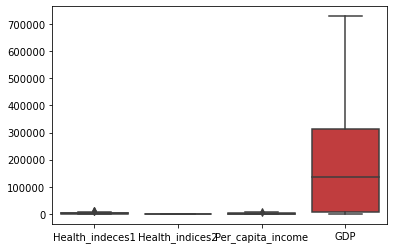

In [63]:
sns.boxplot(data=dataset)

## 2.2. Do you think scaling is necessary for clustering in this case? Justify


Yes, scaling is required in this data set as all features have different weights and to ensure that none of the feature is identified as important only because of the weight, scaling is mandatory for this data set

In [64]:
## Scaling the data using the ZScore Scaling function

from scipy.stats import zscore

#apply the scaler to the data:
df_scaled =  dataset.apply(zscore)
df_scaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.087506,-1.340654,-1.069544,-1.035304
1,-0.562708,-0.101746,0.371362,-0.604838
2,-0.971048,-0.842955,-0.706968,-0.882536
3,-1.198067,-1.428232,-1.063502,-1.044730
4,-1.271283,-1.464545,-1.093716,-1.046096


In [65]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,-6.803387e-17,1.001688,-1.297327,-0.977436,-0.088032,0.719311,3.729034
Health_indices2,297.0,1.252272e-17,1.001688,-1.481634,-1.107825,0.248566,0.810346,1.739527
Per_capita_income,297.0,-1.566274e-16,1.001688,-1.112517,-0.943986,-0.196003,0.658066,3.284732
GDP,297.0,8.032295e-17,1.001688,-1.046096,-0.993971,-0.224273,0.829852,3.319468


Now data is scaled and has std = 1 , it seems the presence of outliers but due to scaling the effect is reduced.

<AxesSubplot:>

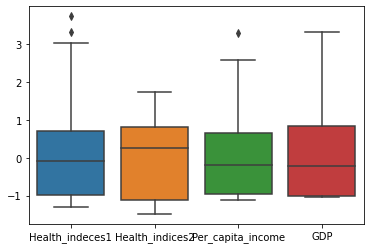

In [66]:
sns.boxplot(data=df_scaled)

## 2.3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.


In [67]:
import scipy.cluster.hierarchy as shc

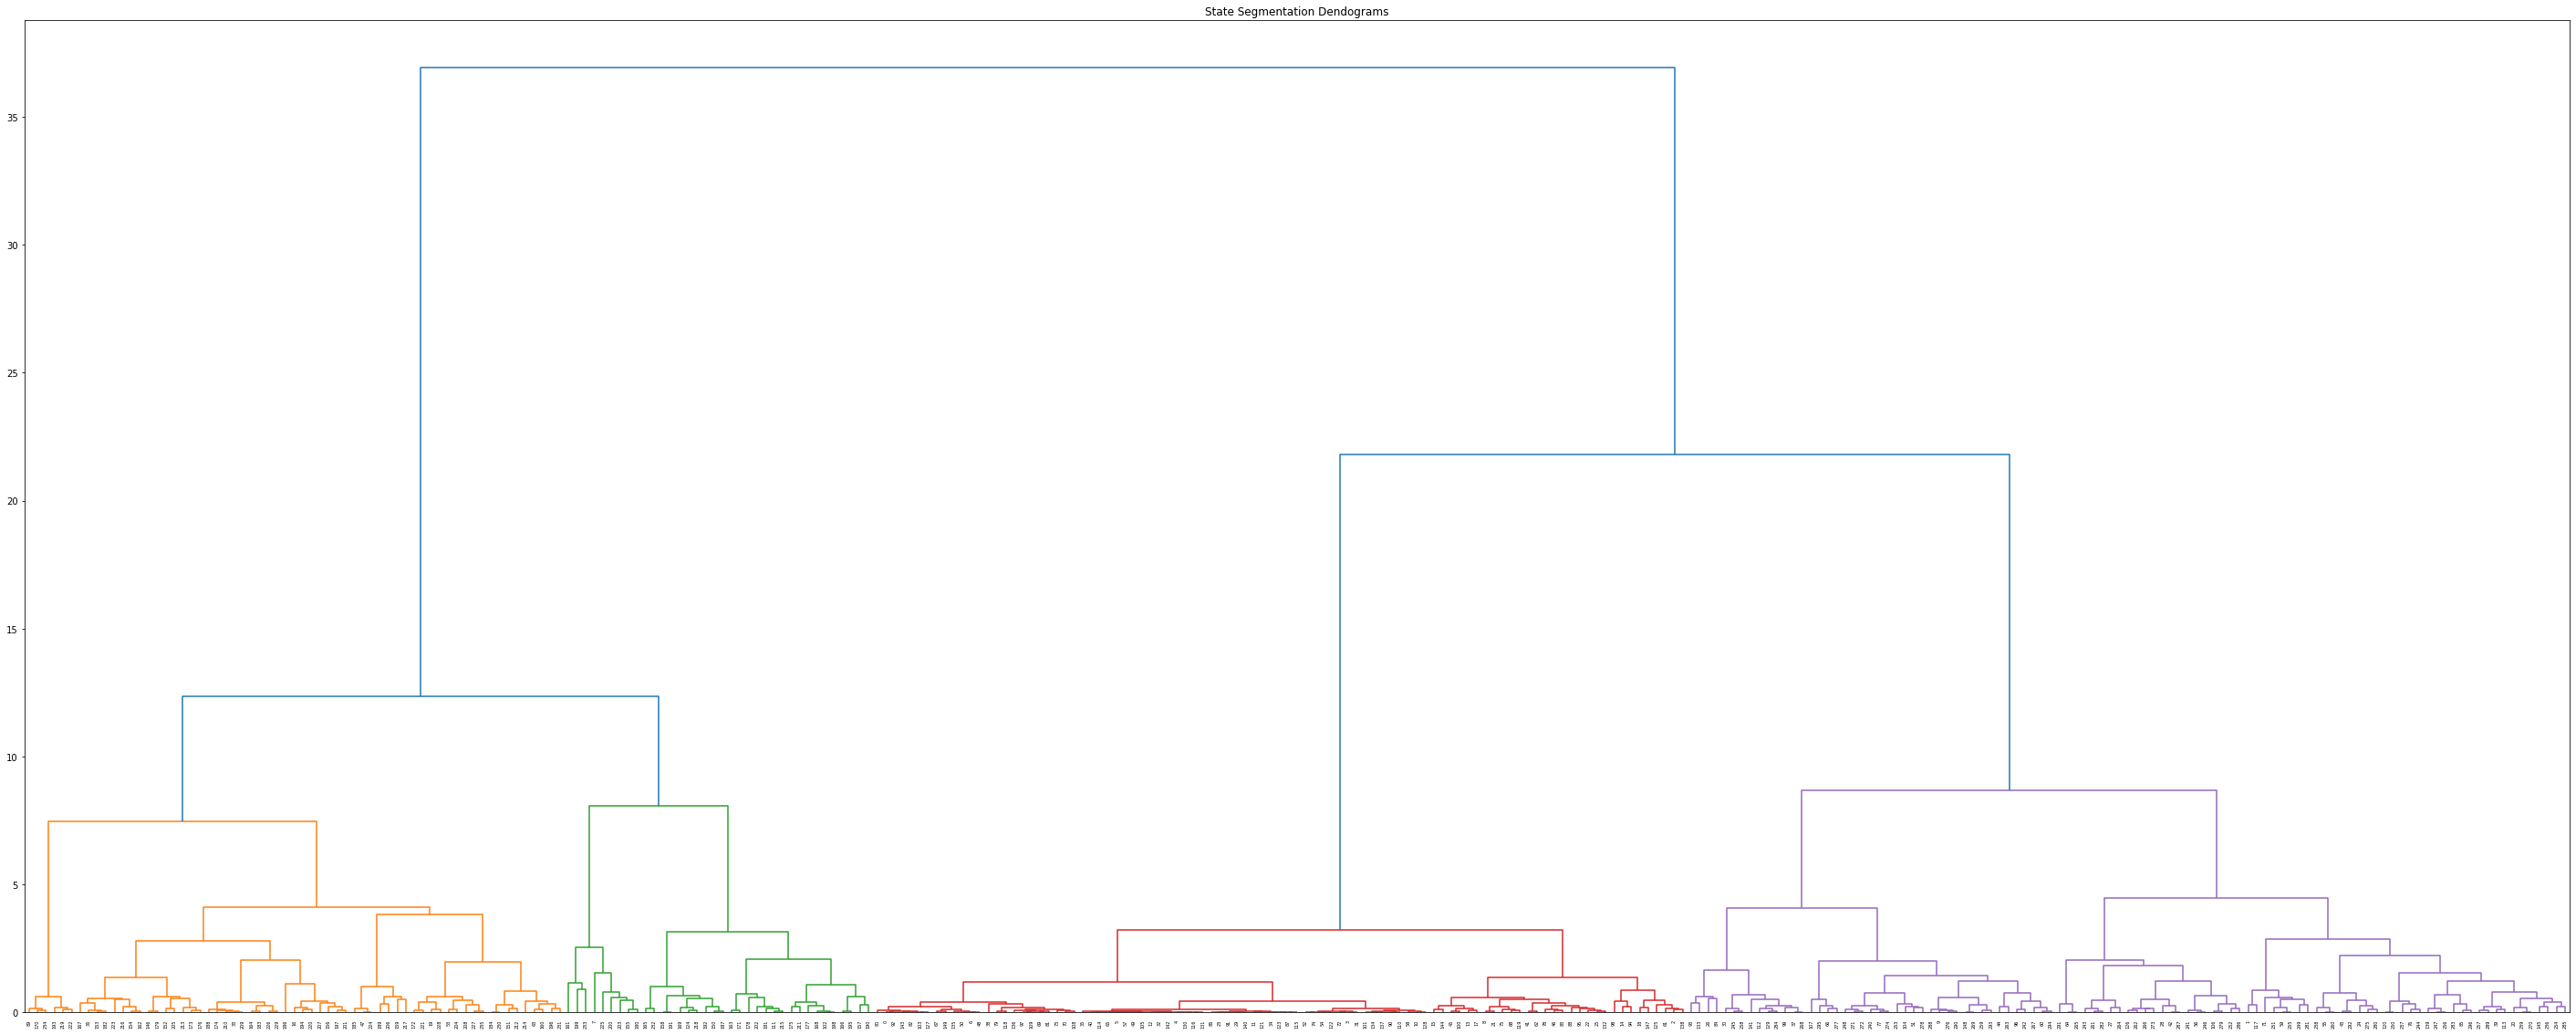

In [68]:
plt.figure(figsize=(50, 20))
plt.title("State Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),color_threshold=10)
#plt.axhline(10, color='black', linestyle='--')
plt.show()

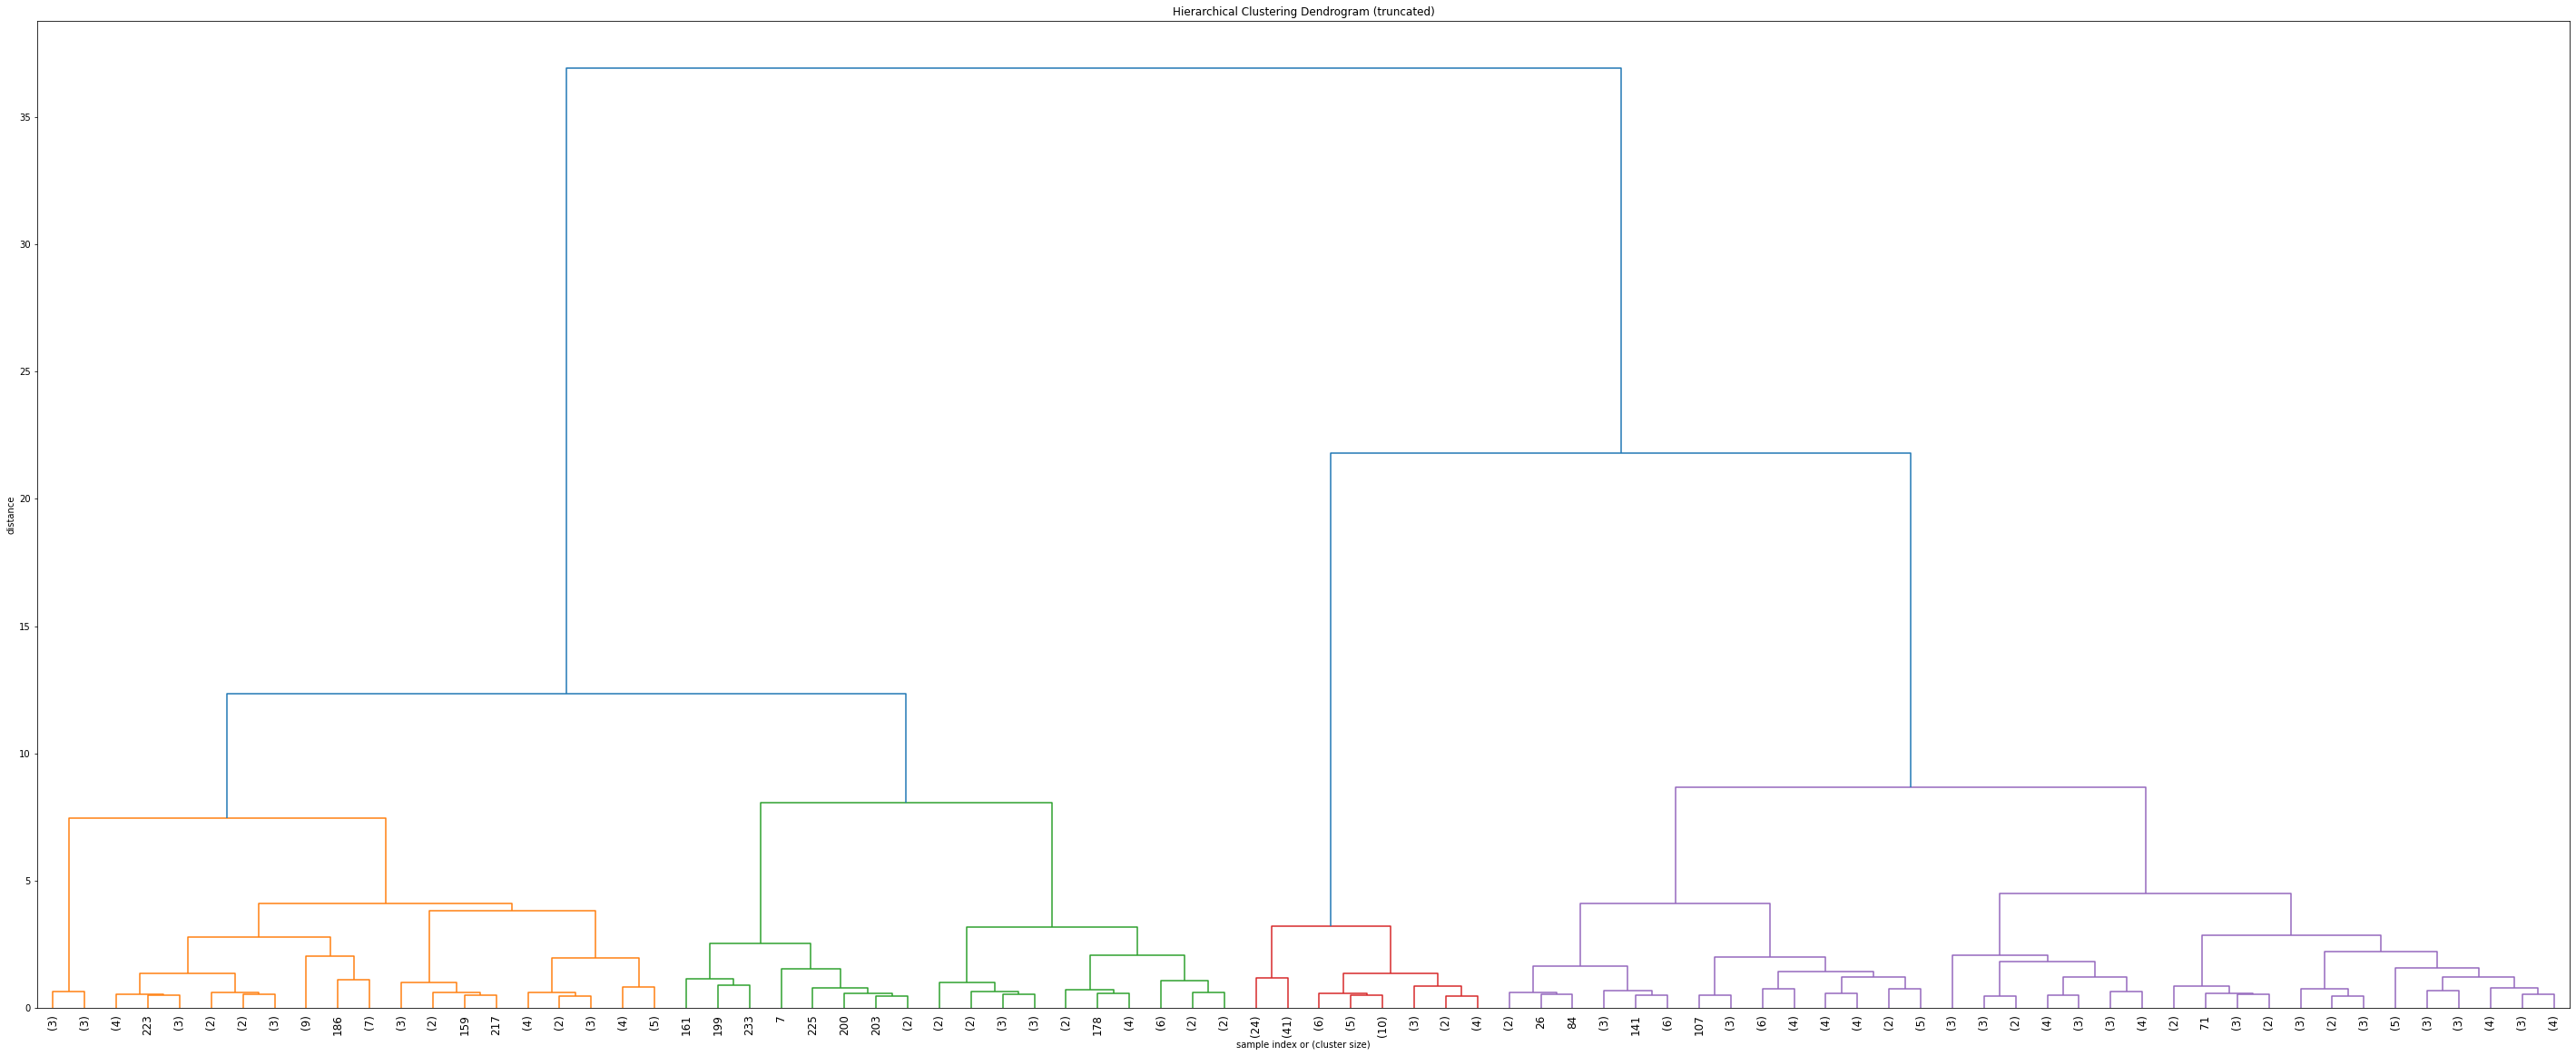

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

Government would like know more than “good” and “not so good” states and hence more insight we are able to generate with more than 2 clusters, better it is for the business. Hence let’s consider 4 clusters and plot the clusters to confirm if the derived clusters are providing the required segmentation details.

In [70]:
# Here 4 is number of clusters we want
clusters_1 = shc.fcluster(shc.linkage(df_scaled, method='ward'), 4, criterion='maxclust')
clusters_1

array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int3

In [71]:
dataset['cluster_1']= clusters_1
dataset.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1
0,417,66,564,1823,3
1,1485,646,2710,73662,4
2,654,299,1104,27318,3
3,192,25,573,250,3
4,43,8,528,22,3


In [72]:
dataset['cluster_1'].value_counts()

4    103
3     95
1     63
2     36
Name: cluster_1, dtype: int64

In [73]:
df_clust_1 = dataset.groupby('cluster_1').mean()
cluster_1_freq = dataset['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster count
cluster_1,,,,,
1,4796.174603,1129.936508,2419.746032,382809.936508,63
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,401.063158,104.536842,680.673684,5388.768421,95
4,2481.776699,748.689320,2347.582524,136004.699029,103


## 2.4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and find the silhouette score.


In [74]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [75]:
# The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 471.31021408677805
The WSS value for 3 clusters is 260.5729408376231
The WSS value for 4 clusters is 183.60983976801262
The WSS value for 5 clusters is 149.787873629525
The WSS value for 6 clusters is 117.21156155994825
The WSS value for 7 clusters is 90.68967995596346
The WSS value for 8 clusters is 79.82968804348847
The WSS value for 9 clusters is 72.1197359790409
The WSS value for 10 clusters is 63.79025376220518


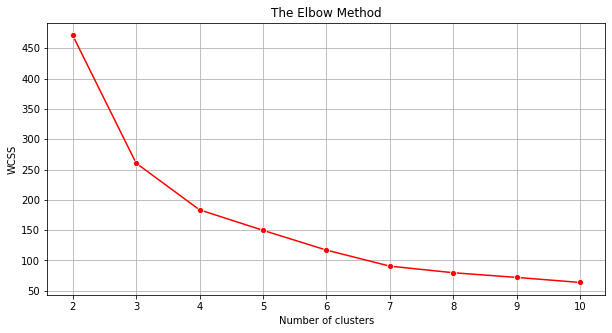

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. 4 clusters were identified as an optimum number.

In [77]:
k_means = KMeans(n_clusters = 4,random_state=42)
k_means.fit(df_scaled)
labels_4 = k_means.labels_
labels_4

array([0, 2, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0,
       0, 3, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       3, 3, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Both hierarchical clustering and k-means have provided good segmentation and either one can be used to define strategies.

## 2.5. Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.


In [78]:
dataset['kmeans_cluster_4']= labels_4

In [79]:
dataset.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1,kmeans_cluster_4
0,417,66,564,1823,3,0
1,1485,646,2710,73662,4,2
2,654,299,1104,27318,3,0
3,192,25,573,250,3,0
4,43,8,528,22,3,0


In [80]:

df_kclust_4 = dataset.groupby('kmeans_cluster_4').mean()
cluster_4_freq = dataset['kmeans_cluster_4'].value_counts().sort_index()
df_kclust_4['cluster count'] = cluster_4_freq
df_kclust_4

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster count
kmeans_cluster_4,,,,,,
0,499.158416,116.356436,693.772277,9428.099010,3.059406,101
1,4799.355932,1142.288136,2372.220339,396907.237288,1.000000,59
2,2597.089109,783.019802,2464.128713,141264.138614,3.881188,101
3,5146.444444,1327.138889,5047.083333,367196.916667,2.000000,36
